In [26]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [27]:
df=pd.read_csv("D:\Data science\machine learning\Feature Scalling\Outlire\Outliers_STD_z_score\heights.csv")
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [28]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: >

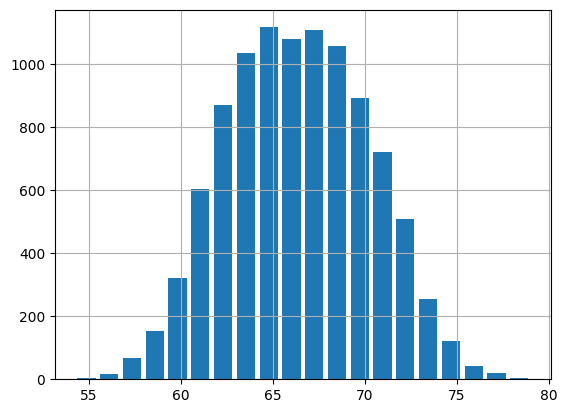

In [29]:

df.height.hist(bins=20, rwidth=0.8)

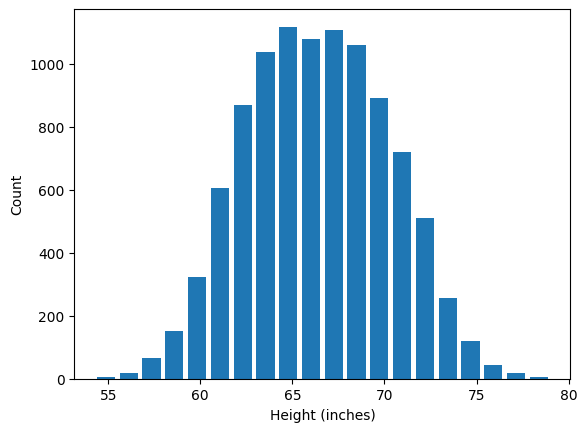

In [30]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [31]:
df.height.mean()

66.367559754866

In [32]:
df.height.std()

3.847528120795573

In [33]:
#outlier detection and removal using 3 standard deviation
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [34]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

In [35]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [36]:
#remove this outlier
df_no_outlier_std_dev = df[(df.height<=upper_limit) & (df.height>=lower_limit)]
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [37]:
df_no_outlier_std_dev.shape

(9993, 2)

In [38]:
df.shape

(10000, 2)

In [39]:
#outlier detection using z_score

In [40]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [41]:
(73.84-66.37)/3.84

1.9453124999999998

In [42]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [43]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [44]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [45]:
#remove outlier
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [46]:
df_no_outliers.shape


(9993, 3)

In [47]:
df.shape

(10000, 3)